## PRODIGY INFO TECH DATA SCIENCE INTERN
### PRAGADEESH G

### TASK 2: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.



In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [36]:
task2 = pd.read_csv("D:\prodigy info tech\WineQT.csv")
task2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [37]:
task2['Id'] = range(1, len(task2) + 1)

In [38]:
task2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   1  
1      9.8        5   2  
2      9.8        5   3  
3      9.8        6   4  
4      9.4        5   5

In [39]:
# Check for missing values
print(task2.isnull().sum())

# Summary statistics of the data
print(task2.describe())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         

In [40]:
task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


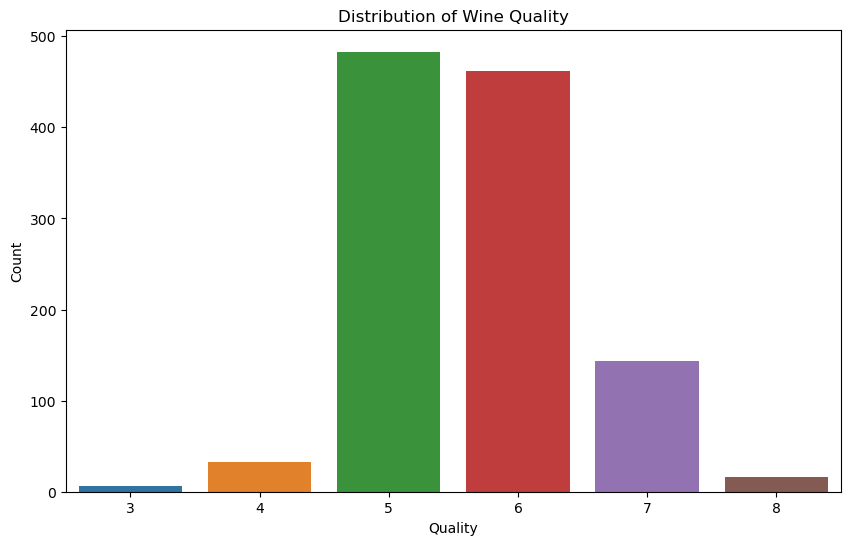

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of wine quality
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=task2)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


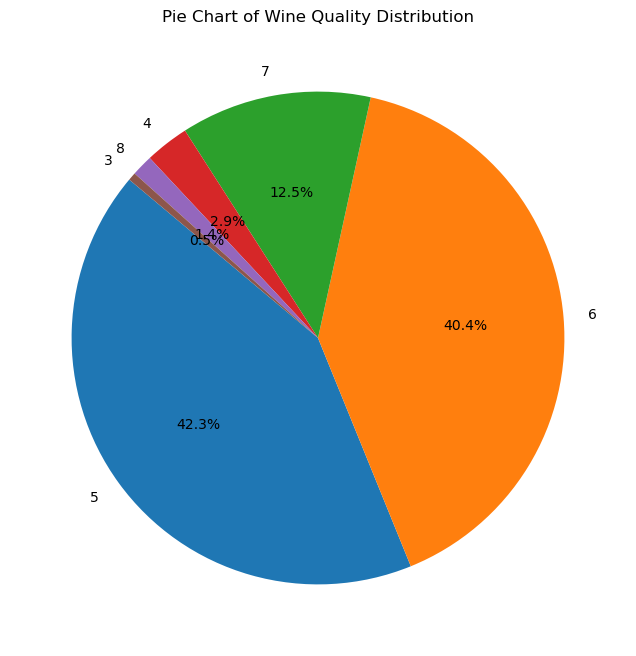

In [42]:
# Pie chart of wine quality
quality_counts = task2['quality'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Wine Quality Distribution')
plt.show()


##  Feature Selection

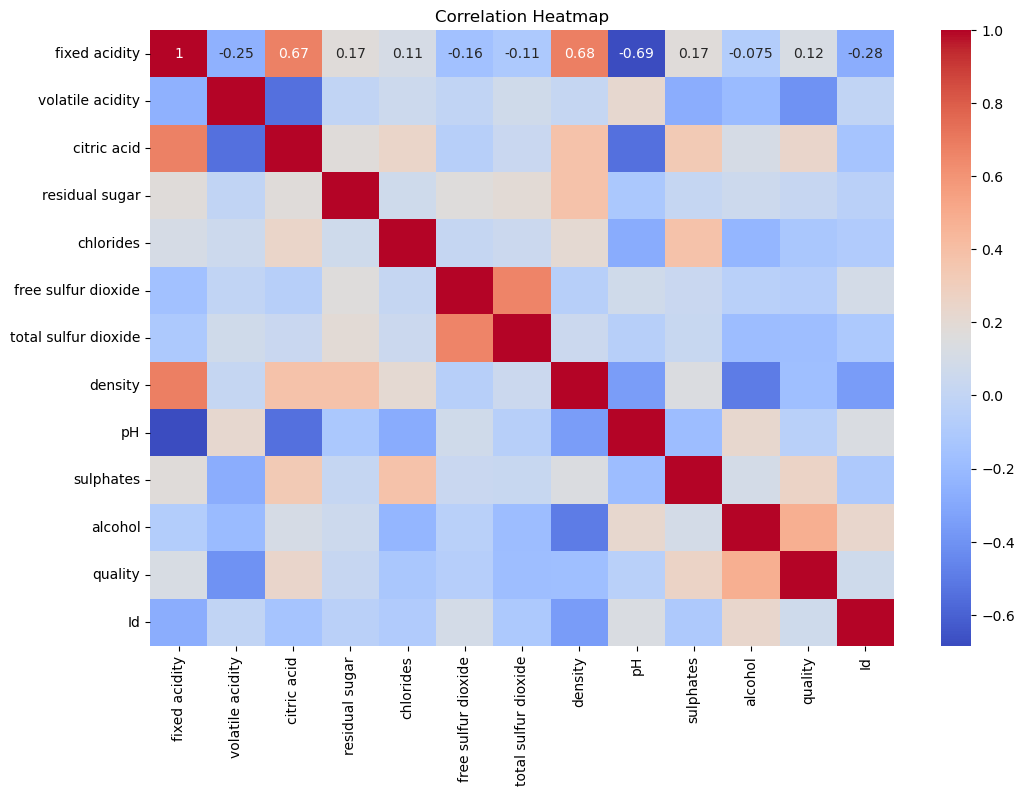

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.067794
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [43]:
# Correlation matrix
correlation_matrix = task2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated features with quality
correlated_features = correlation_matrix['quality'].sort_values(ascending=False)
print(correlated_features)

D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

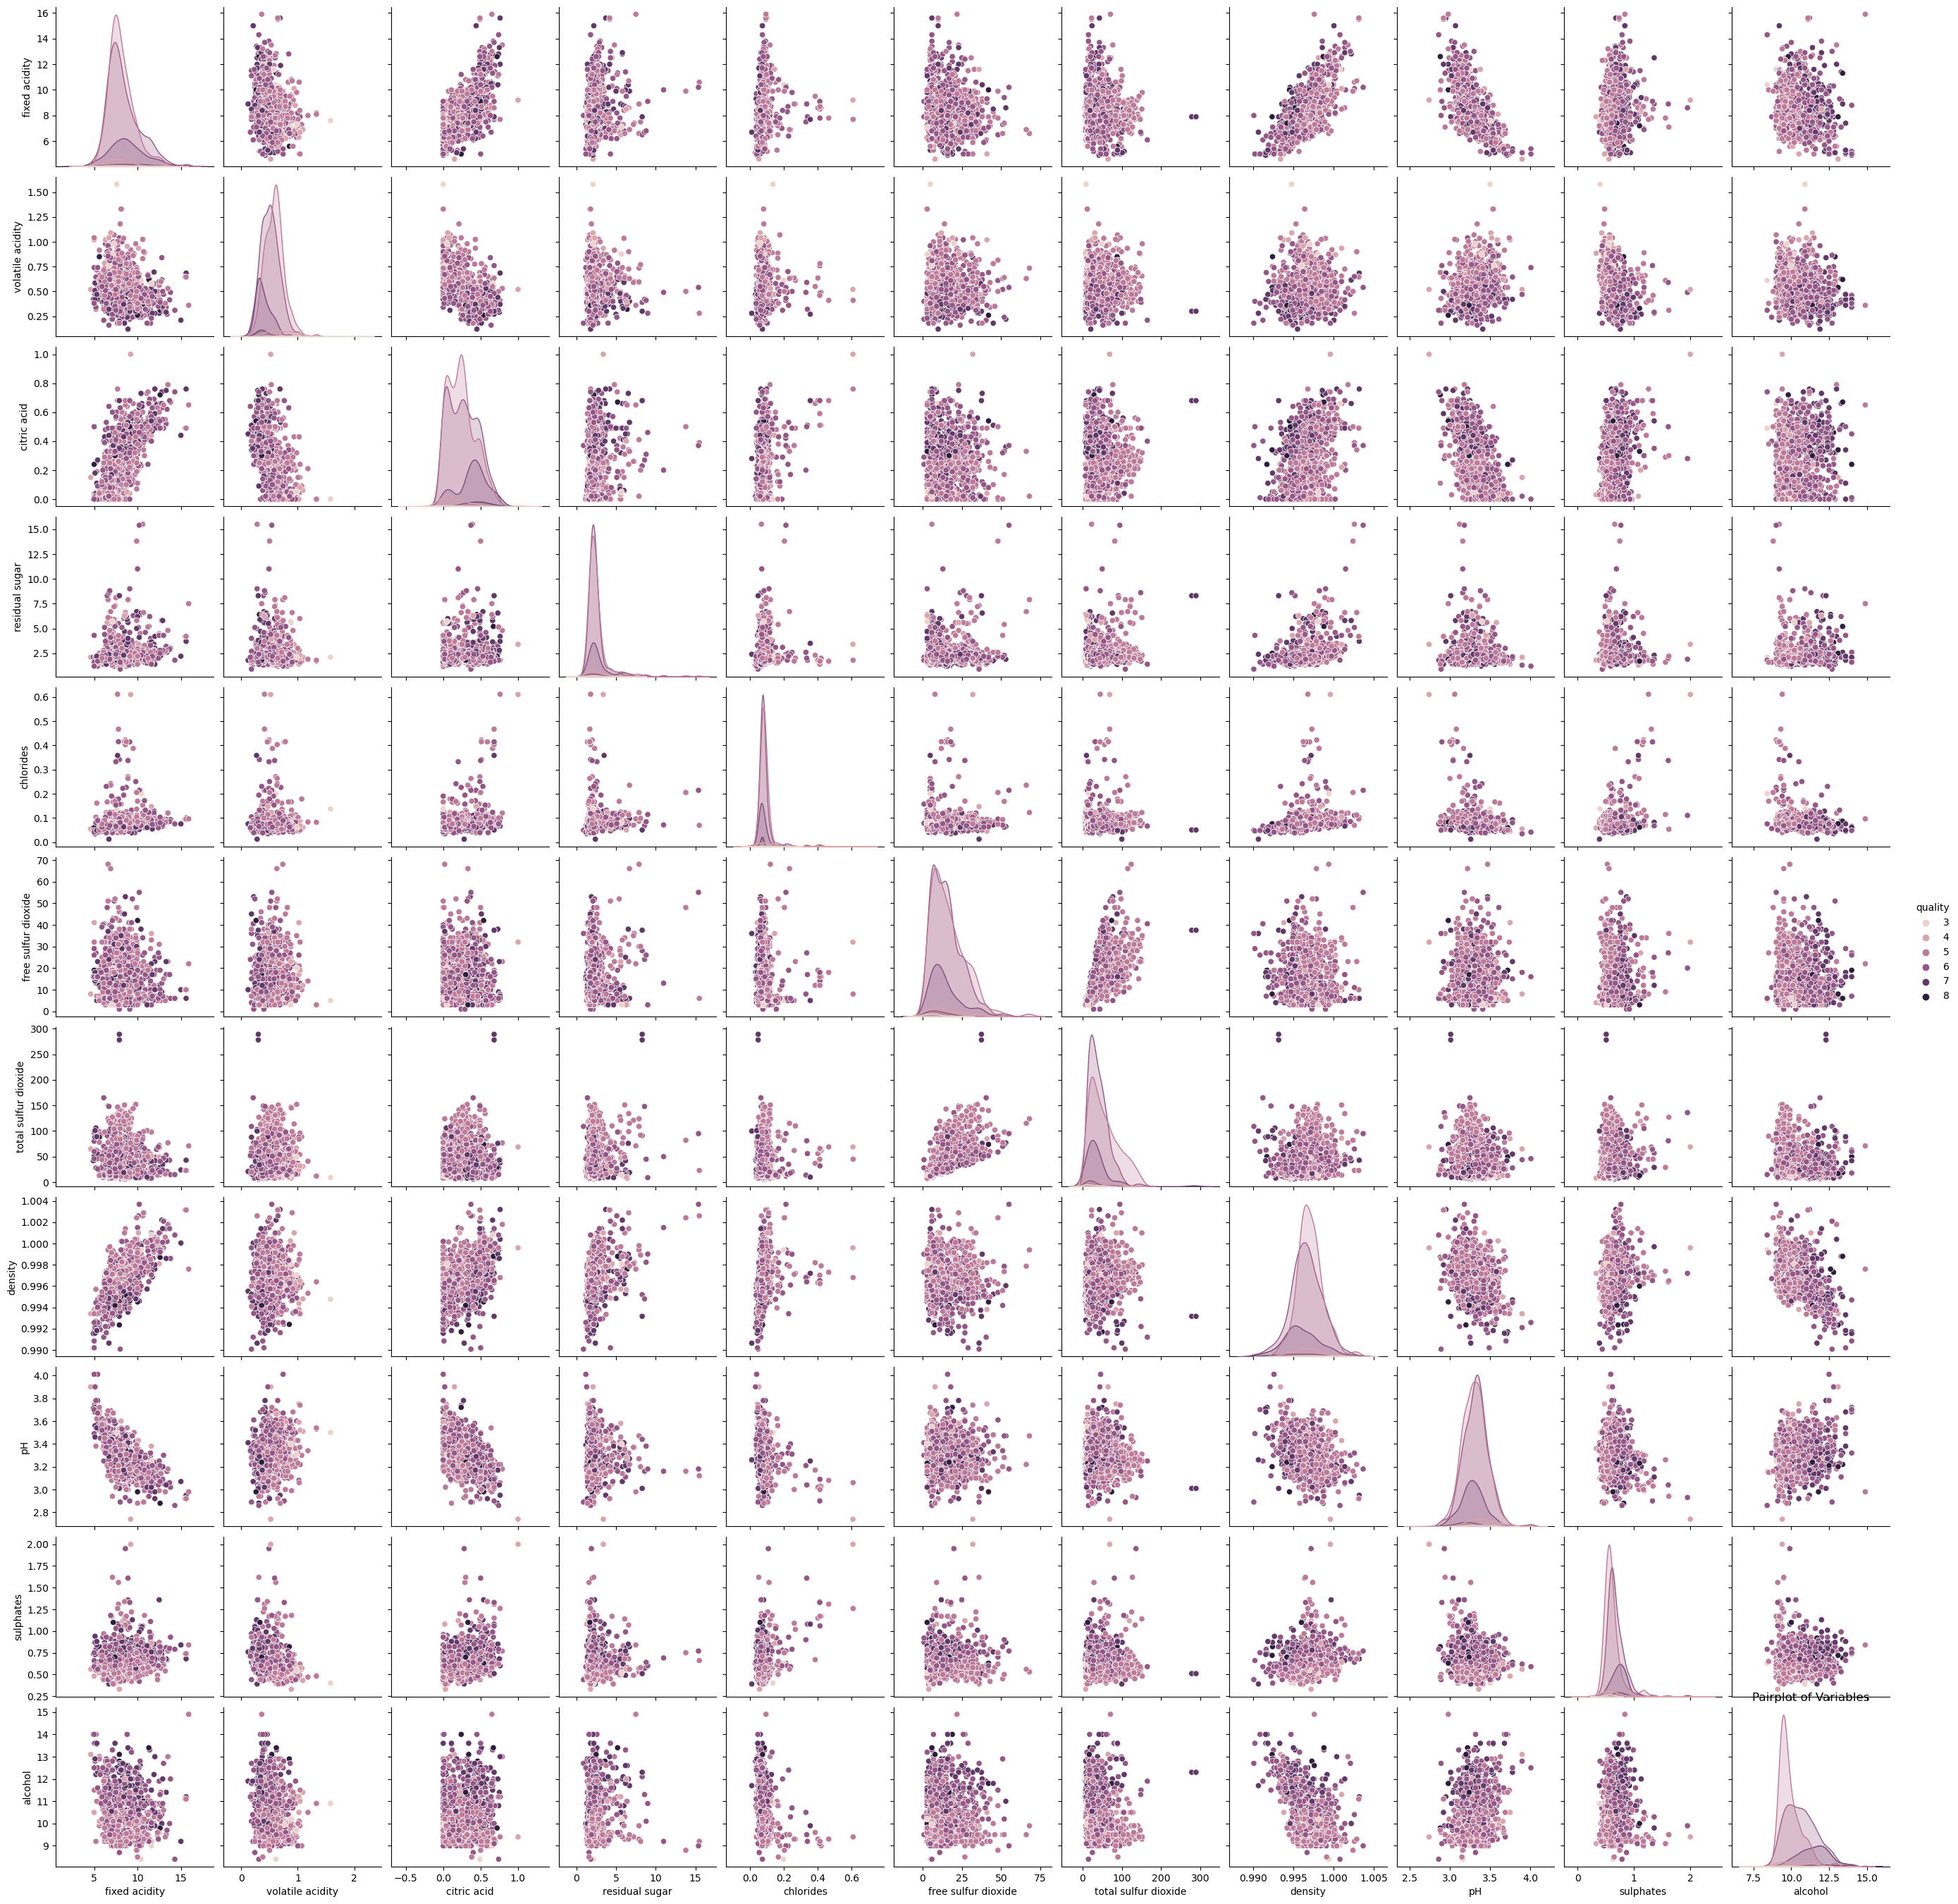

In [44]:
# Pairplot of variables
sns.pairplot(task2, hue='quality', vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
plt.title('Pairplot of Variables')
plt.show()


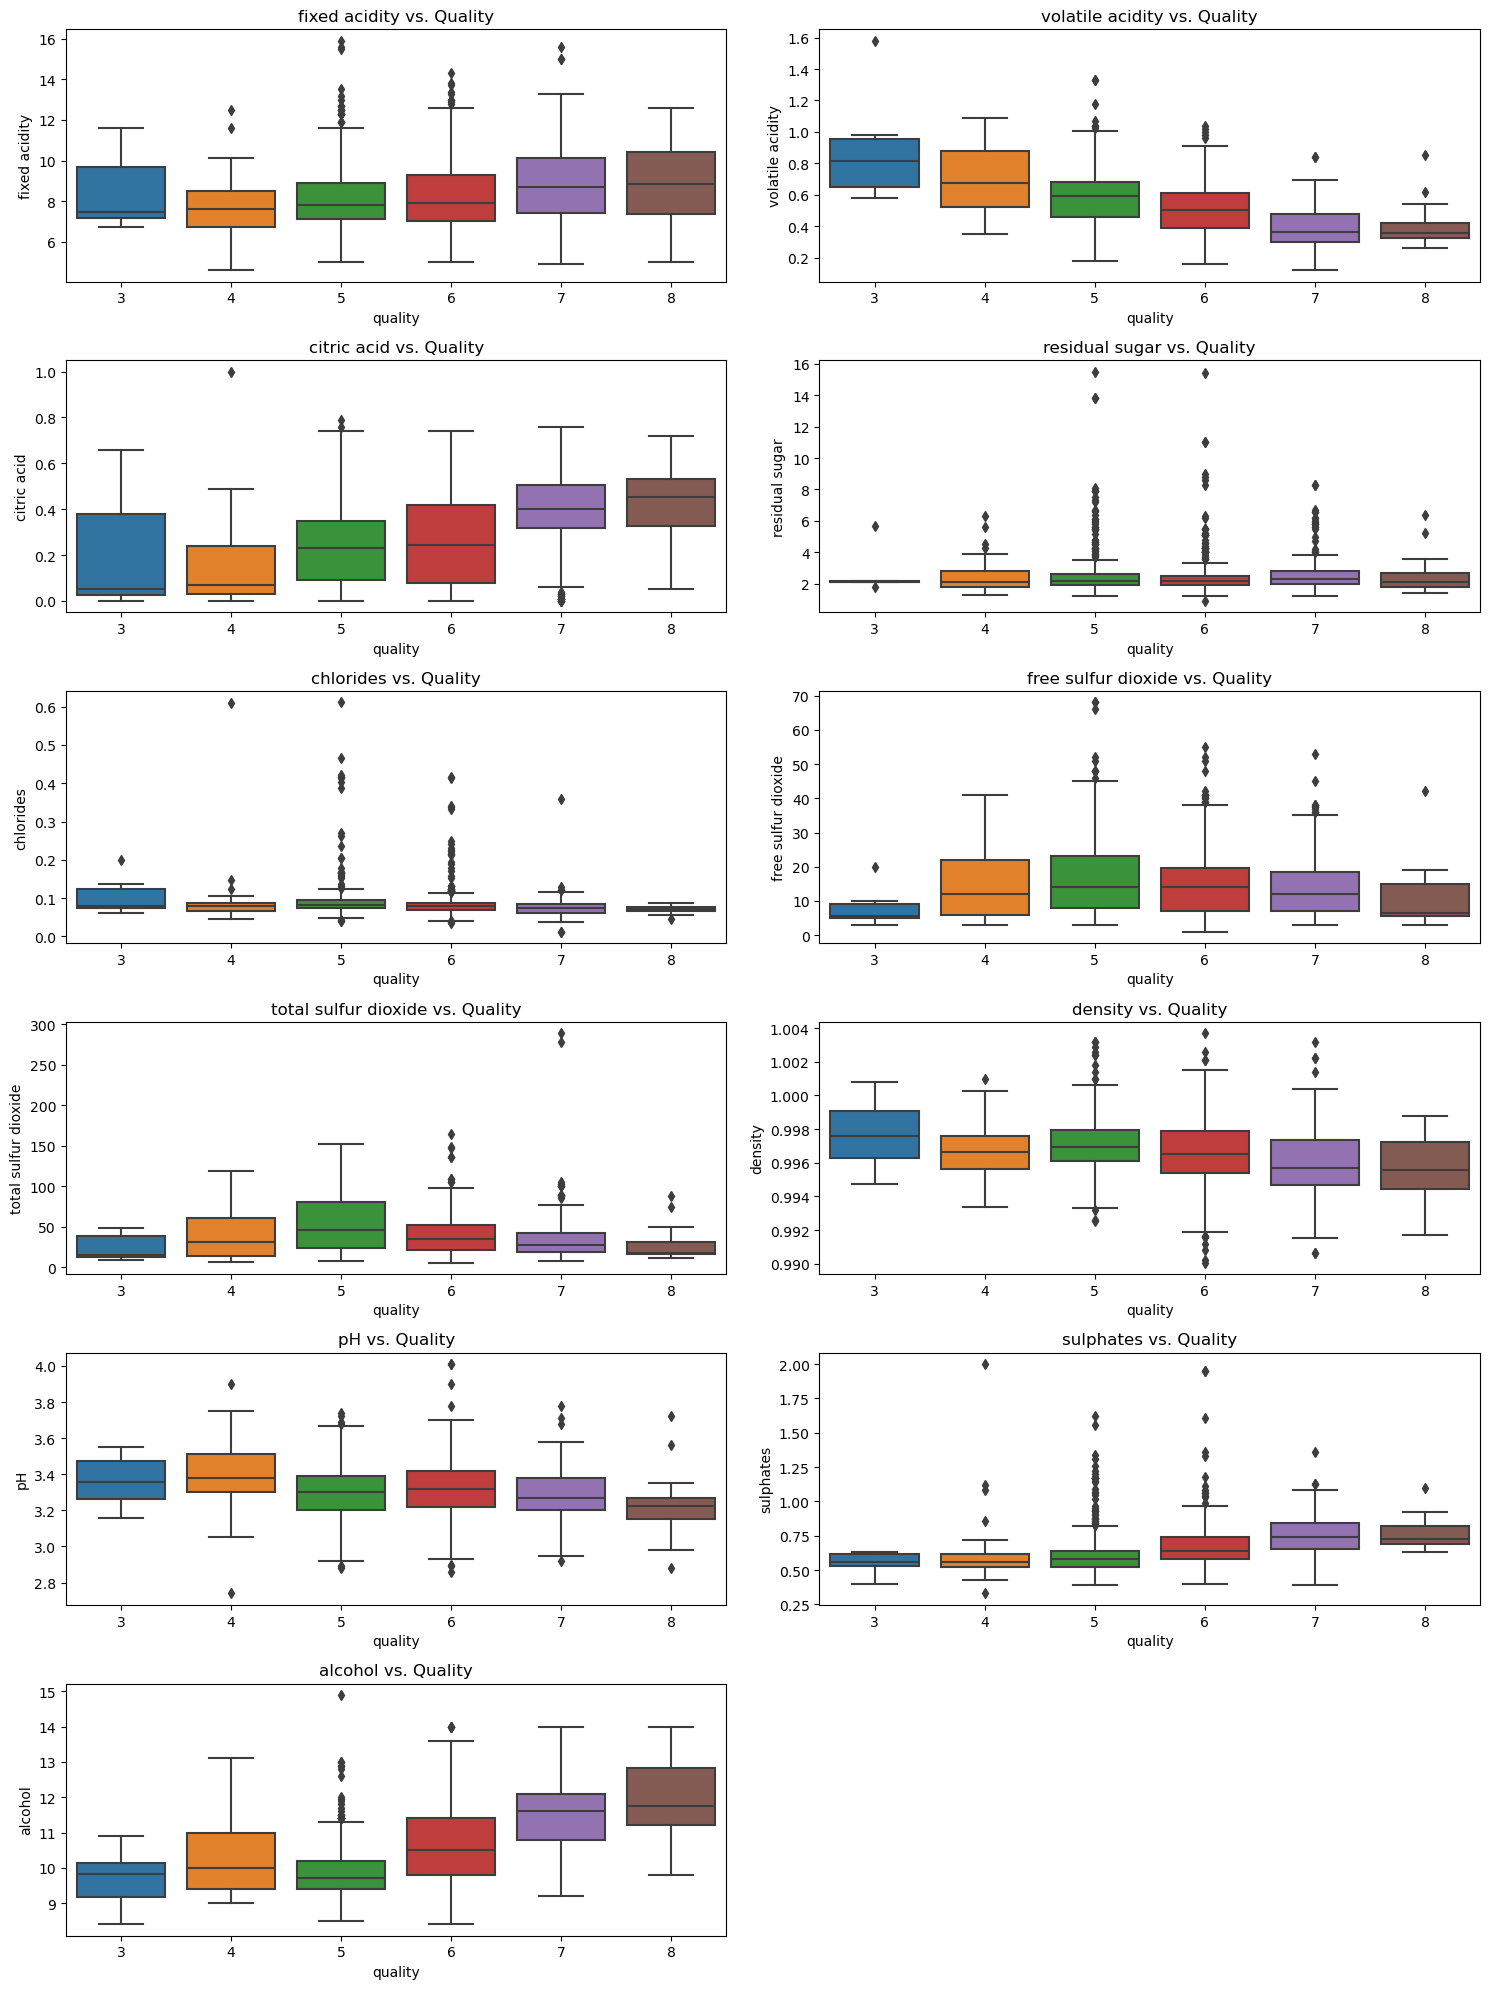

In [45]:
# Boxplots of features vs. quality
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(6, 2, i+1)
    sns.boxplot(x='quality', y=feature, data=task2)
    plt.title(f'{feature} vs. Quality')

plt.tight_layout()
plt.show()


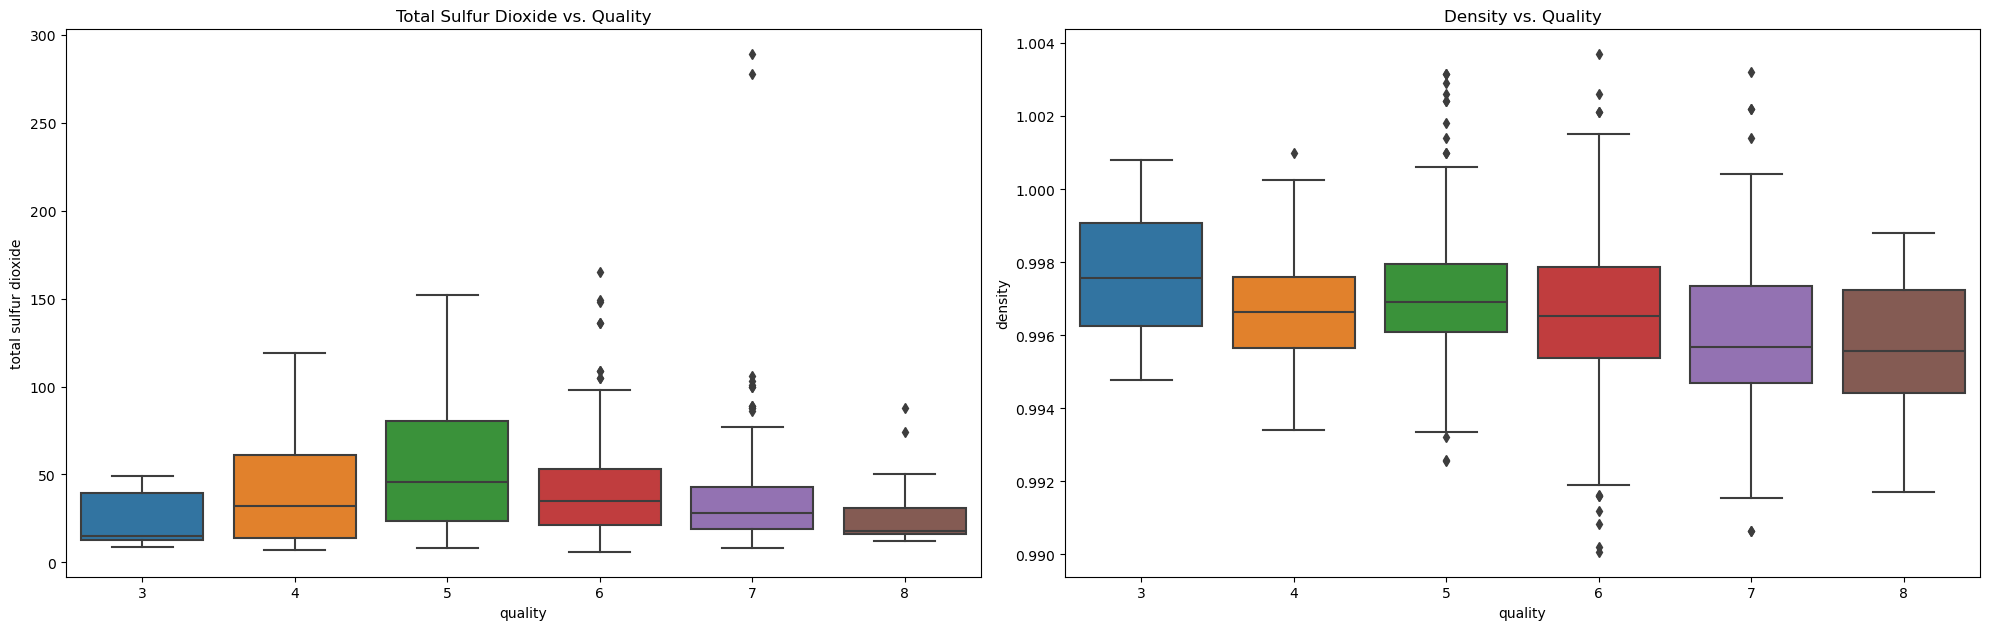

In [46]:
plt.figure(figsize=(20, 30))



# Total Sulfur Dioxide vs. Quality
plt.subplot(5, 2, 7)
sns.boxplot(x='quality', y='total sulfur dioxide', data=task2)
plt.title('Total Sulfur Dioxide vs. Quality')

# Density vs. Quality
plt.subplot(5, 2, 8)
sns.boxplot(x='quality', y='density', data=task2)
plt.title('Density vs. Quality')



plt.tight_layout()
plt.show()

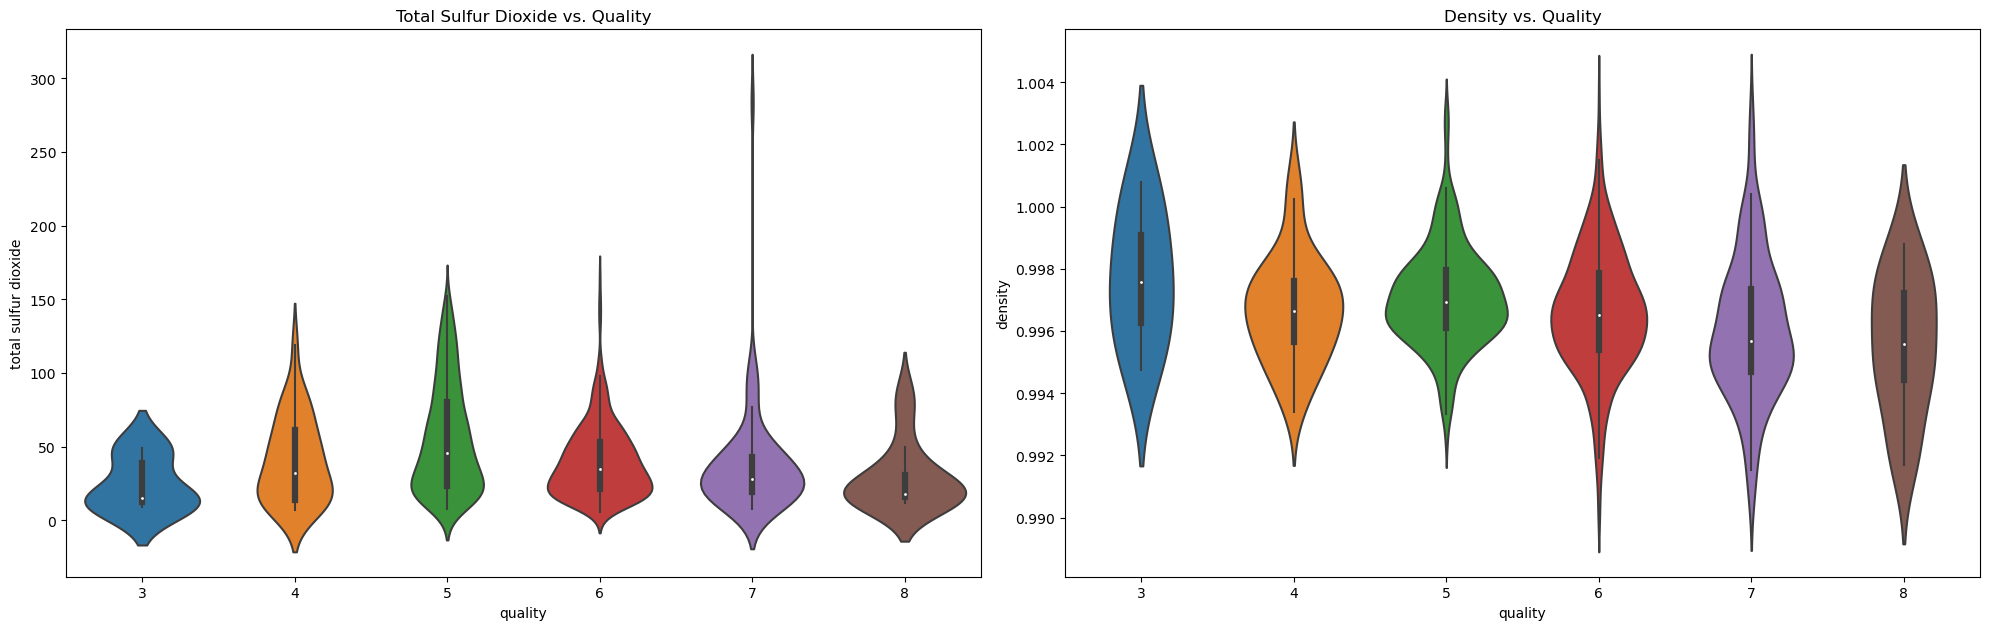

In [47]:
# Violin plots for each feature vs. quality
plt.figure(figsize=(20, 30))

# Total Sulfur Dioxide vs. Quality
plt.subplot(5, 2, 7)
sns.violinplot(x='quality', y='total sulfur dioxide', data=task2)
plt.title('Total Sulfur Dioxide vs. Quality')

# Density vs. Quality
plt.subplot(5, 2, 8)
sns.violinplot(x='quality', y='density', data=task2)
plt.title('Density vs. Quality')

plt.tight_layout()
plt.show()


Accuracy: 0.7030567685589519
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229



D:\Users\praga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


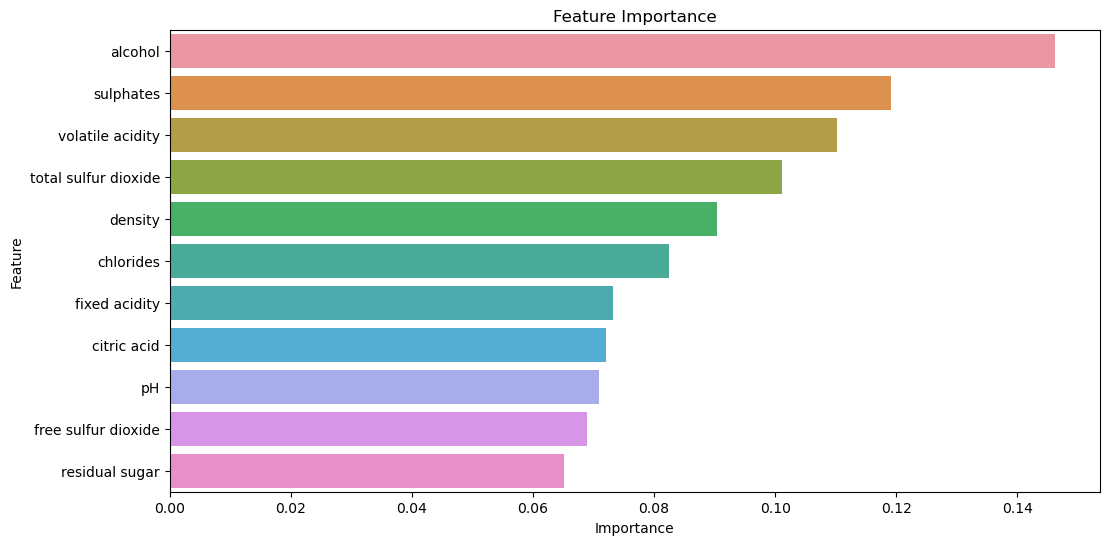

In [48]:

# Define features and target
X = task2.drop(columns=['quality', 'Id'])
y = task2['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [49]:
sample = X_test.iloc[0]  # test data
sample_df = sample.to_frame().T  
prediction = model.predict(sample_df)
print(f"Predicted quality: {prediction[0]}, Actual quality: {y_test.iloc[0]}")

Predicted quality: 5, Actual quality: 5


In [50]:
# test sample
sample_index = 10  
sample = X_test.iloc[sample_index]
sample_df = sample.to_frame().T  # Convert the sample to a DataFrame to retain feature names

# Make predictions
prediction = model.predict(sample_df)

# Print predicted and actual quality
print(f"Predicted quality: {prediction[0]}, Actual quality: {y_test.iloc[sample_index]}")


Predicted quality: 7, Actual quality: 7


## Patterns and Trends
### Quality Distribution: The majority of the wines have a quality rating of 5, 6, or 7. Very few wines have extremely low (3) or high (8) quality ratings.

### Correlation Analysis:

### Alcohol: There is a positive correlation between alcohol content and wine quality. Higher alcohol content tends to be associated with better quality wines.
### Sulphates: There is a moderate positive correlation between sulphates and wine quality. Sulphates may contribute to the preservation and taste, impacting quality.
### Density: There is a negative correlation between density and wine quality. Higher density tends to be associated with lower quality wines.
### Volatile Acidity: There is a negative correlation between volatile acidity and wine quality. Higher levels of volatile acidity tend to be associated with lower quality wines.
## Feature vs. Quality Analysis:

### Fixed Acidity: No clear pattern between fixed acidity and wine quality.
### Citric Acid: Wines with higher citric acid content tend to have slightly better quality.
### Residual Sugar: No clear pattern between residual sugar and wine quality.
### Chlorides: Wines with lower chloride levels tend to have better quality.
### Free Sulfur Dioxide: No clear pattern between free sulfur dioxide and wine quality.
### Total Sulfur Dioxide: Wines with lower total sulfur dioxide levels tend to have slightly better quality.
### pH: No clear pattern between pH and wine quality.